$$ T_0(t) = A + B\sin{\frac{2\pi t}{\tau}} $$

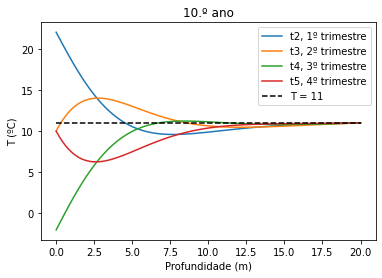

Wall time: 783 ms


In [41]:
%%time
import numpy as np
import matplotlib.pyplot as plt

profundiadeMax = 20     # m 
D = 0.1                 # m**2 / dia ---> Thermal diffusivity
N = 100                 # Number of divisions in grid
a = profundiadeMax / N  # Grid spacing
h = 0.05                # Time-step ----> cheguei a este valor por tentativa erro
epsilon = h/10000

tau = 365 # dias
A = 10    # ºC
B = 12    # ºC
def Tsup(t):
    return A + B*np.sin(2*np.pi*t / tau)

t1 = 9 * tau        # 9 anos em dias 
t2 = 9.25 * tau     # 1º trimestre do 10º ano, pois já estão completos os 9 anos
t3 = 9.5 * tau
t4 = 9.75 * tau
t5 = 10.0 * tau     # fim do 10º ano
tend = t5 + epsilon

# Create arrays
T = np.ones(N+1,float) * 10 # Temp = 10ºC em todo lado
T[N] = 11
Tp = np.ones(N+1,float) * 10
Tp[N] = 11
x = np.linspace(0, profundiadeMax, N+1)

# Main loop
t = 0.0
c = h*D/(a**2)
while t < tend:
    T[0] = Tsup(t)
    Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1]-2*T[1 :N]) # isto é 20x mais rápido que o ciclo for
    
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t2)<epsilon:
        plt.plot(x,T,label= "t2, 1º trimestre")
    elif abs(t-t3)<epsilon:
        plt.plot(x,T,label= "t3, 2º trimestre")
    elif abs(t-t4)<epsilon:
        plt.plot(x,T,label= "t4, 3º trimestre")
    elif abs(t-t5)<epsilon:
        plt.plot(x,T,label= "t5, 4º trimestre")
        
y = np.ones(N+1) * 11
plt.plot(x,y, "k--", label = "T = 11") # T = 11ºC é a Temp a 20 m de profundidade
plt.title("10.º ano")
plt.xlabel("Profundidade (m)")
plt.ylabel("T (ºC)")
plt.legend()
plt.show()